In [1]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# Import the sqlalchemy extract function.
from sqlalchemy import extract

results_june = []
# 1. Write a query that filters the Measurement table to retrieve the temperatures for the month of June.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6)

In [5]:
# 2. Convert the June temperatures to a list.
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 6).all()

In [6]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
df_june = pd.DataFrame(results_june, columns=['date','June Temps'])

In [7]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
df_june.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
results_dec = []

# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12)

In [9]:
# 7. Convert the December temperatures to a list.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df_dec = pd.DataFrame(results_dec, columns=['date','December Temps'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df_dec.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


In [13]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

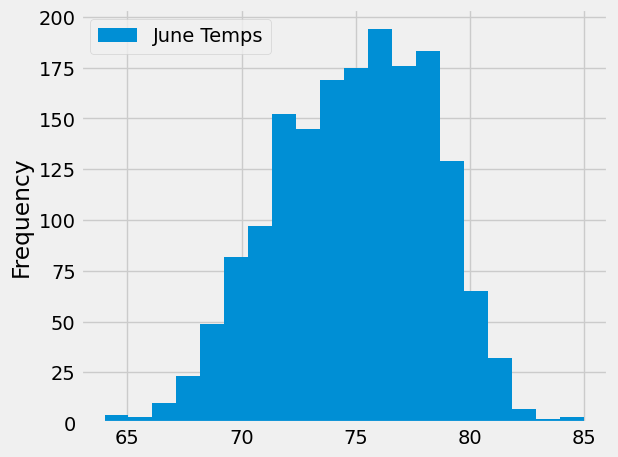

In [14]:
df_june.plot.hist(bins=20)
plt.tight_layout()

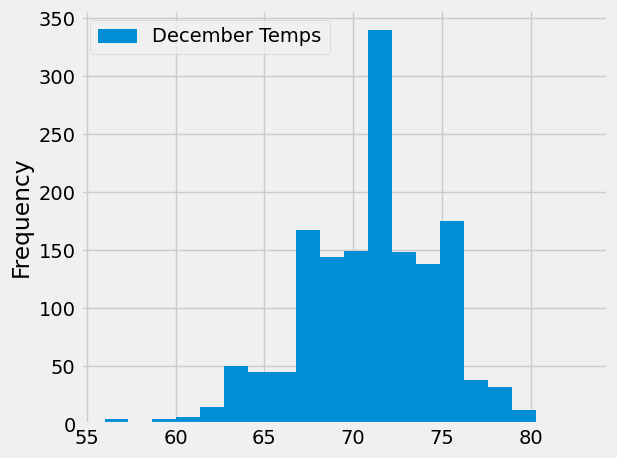

In [15]:
df_dec.plot.hist(bins=20)
plt.tight_layout()

In [16]:
june_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 6).all()

In [17]:
dec_station = session.query(Measurement.tobs, Measurement.station).filter(extract('month',Measurement.date)== 12).all()

In [18]:
june_station_df = pd.DataFrame(june_station, columns=['June Temps', 'Station'])
june_station_df

,June Temps,Station
0,78.0,USC00519397
1,76.0,USC00519397
2,78.0,USC00519397
3,76.0,USC00519397
4,77.0,USC00519397
...,...,...
1695,79.0,USC00516128
1696,74.0,USC00516128
1697,74.0,USC00516128
1698,76.0,USC00516128


In [19]:
dec_station_df = pd.DataFrame(dec_station, columns=['Dec Temps', 'Station'])
dec_station_df

,Dec Temps,Station
0,76.0,USC00519397
1,74.0,USC00519397
2,74.0,USC00519397
3,64.0,USC00519397
4,64.0,USC00519397
...,...,...
1512,71.0,USC00516128
1513,71.0,USC00516128
1514,69.0,USC00516128
1515,65.0,USC00516128


In [20]:
station_temps = june_station_df.merge(dec_station_df, on="Station", how="inner").set_index("Station")
station_temps

,June Temps,Dec Temps
Station,,
USC00519397,78.0,76.0
USC00519397,78.0,74.0
USC00519397,78.0,74.0
USC00519397,78.0,64.0
USC00519397,78.0,64.0
...,...,...
USC00516128,75.0,71.0
USC00516128,75.0,71.0
USC00516128,75.0,69.0
